# Linear Regression

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Step 1: Understanding Data

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [162]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [163]:
df.rename(columns={'yr':'year', 'mnth':"month", 'hum': "humidity"}, inplace=True)

In [164]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Data Preprocessing

## Data Transformation

- converting `season` to `spring`, `summer`,`fall`, `winter`
- converting `weathersit` to `clear`, `mist`, `light_rain` and `heavy_rain`
- converting `weekday` to `Sunday`, `monday`, `tuesday`, `wednesday`, `thursday`, `friday` and `saturday` for 0 to 6 respectively
- converting `month` to `january`, `february`, `march`, `april`, `may`, `june`, `july`, `august`, `september`, `october`, `november` and `december` for 1 to 12 respectively

In [165]:
df_2 = df.copy()
df_2.shape

(730, 16)

In [166]:
df_2.drop_duplicates(inplace=True)
df_2.shape

(730, 16)

In [167]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [168]:
# Dict for seasons and weather

season_dict = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
weather_dict = {1: "clear", 2: "mist", 3: "light_rain", 4: "heavy_rain"}

# based on the above output of 6 and 0 being eithor weekend or holiday,
# we can create a dictionary for the days of the week
weekday_dict = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
}
mnth_dict = {
    1: "january",
    2: "february",
    3: "march",
    4: "april",
    5: "may",
    6: "june",
    7: "july",
    8: "august",
    9: "september",
    10: "october",
    11: "november",
    12: "december",
}

# converting months into quarters
month_dict = {
    "january": "q1",
    "february": "q1",
    "march": "q1",
    "april": "q2",
    "may": "q2",
    "june": "q2",
    "july": "q3",
    "august": "q3",
    "september": "q3",
    "october": "q4",
    "november": "q4",
    "december": "q4",
}

In [169]:
df_2["season"] = df_2["season"].map(season_dict)
df_2["weathersit"] = df_2["weathersit"].map(weather_dict)
df_2["weekday"] = df_2["weekday"].map(weekday_dict)
df_2["month"] = df_2["month"].map(mnth_dict)
# df_2["quarter"] = df_2["month"].str.lower().map(month_dict)

### Dropping the columns which are not required

In [170]:
df_2.drop(columns=["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [171]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [172]:
df_2.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Data Visualization

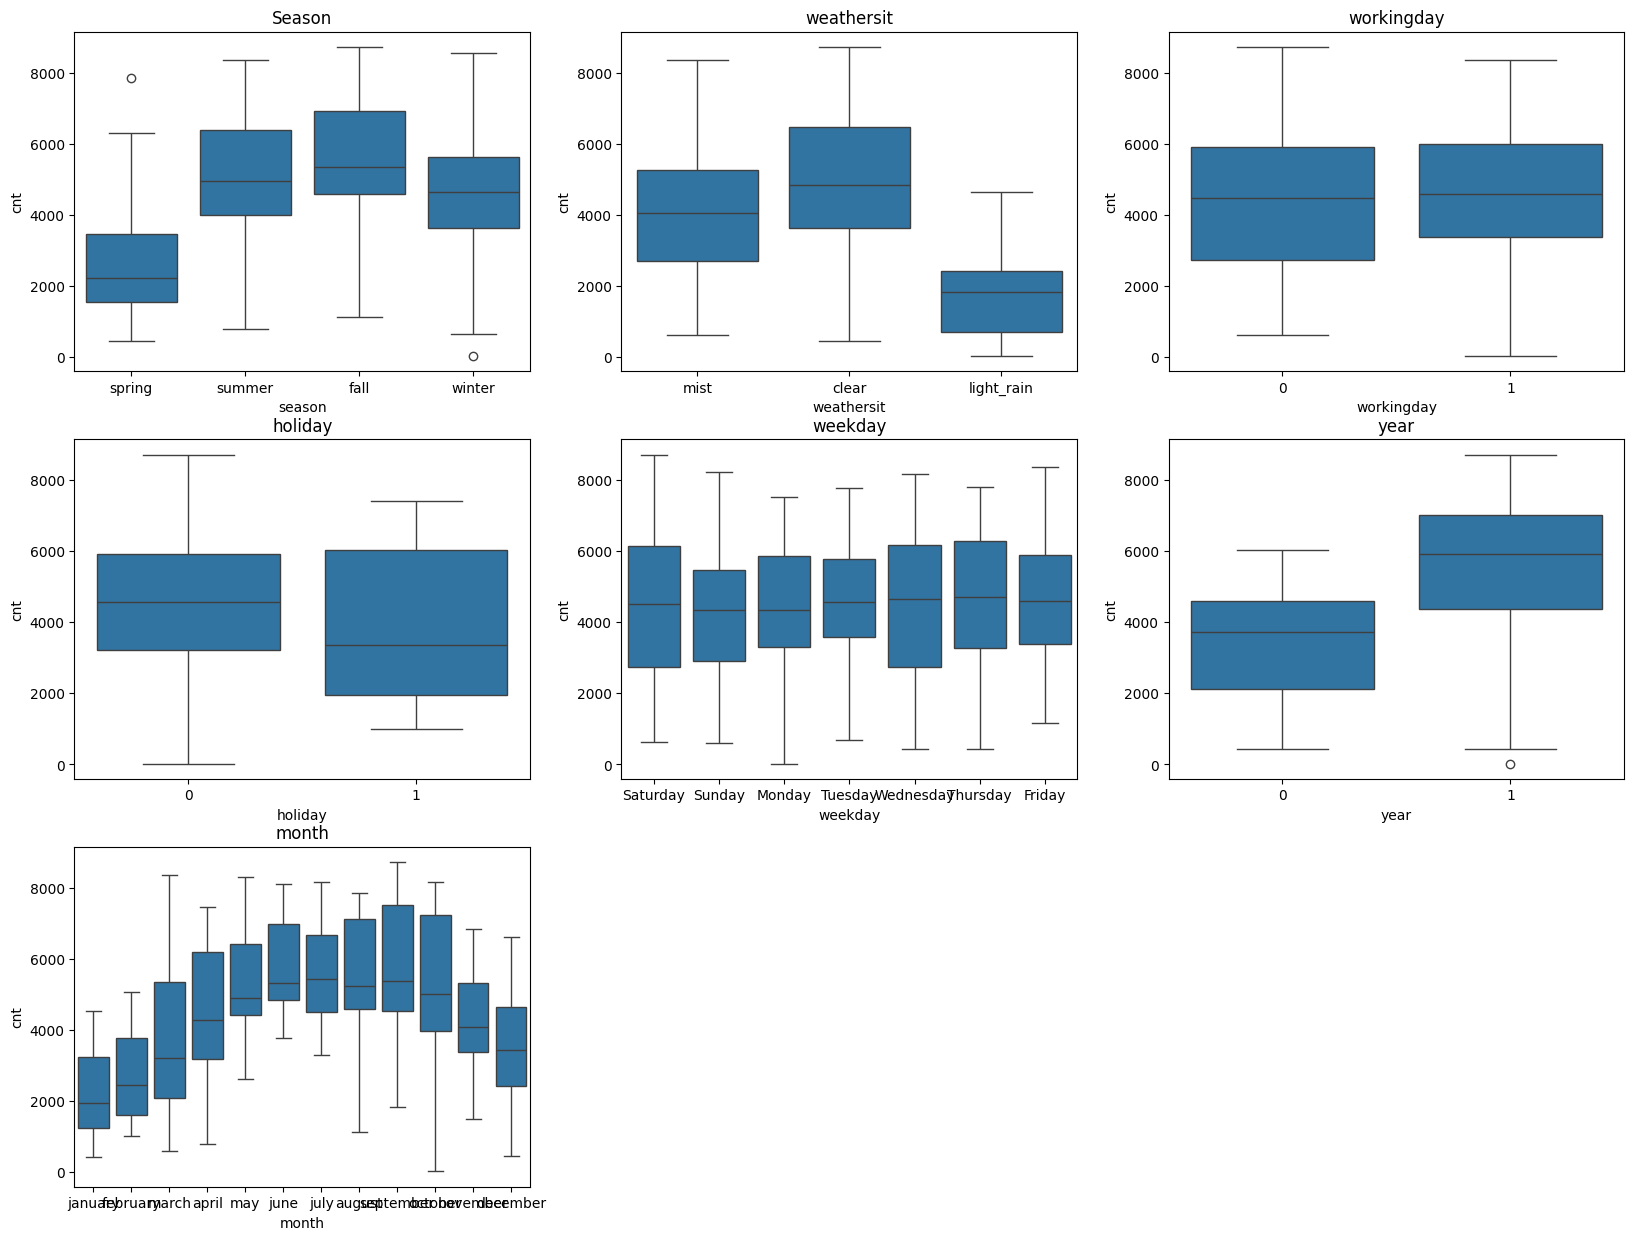

In [173]:
fig = plt.figure(figsize=(20,15))

ax0 = plt.subplot(3,3,1, title="Season")
ax1 = plt.subplot(3,3,2, title="weathersit")
ax2 = plt.subplot(3,3,3, title="workingday")
ax3 = plt.subplot(3,3,4, title="holiday")
ax4 = plt.subplot(3,3,5, title="weekday")
ax5 = plt.subplot(3,3,6, title="year")
ax6 = plt.subplot(3,3,7, title="month")
# ax7 = plt.subplot(3,3,8, title="quarter")

sns.boxplot(data=df_2, ax=ax0, y='cnt', x='season')
sns.boxplot(data=df_2, ax=ax1, y='cnt', x='weathersit')
sns.boxplot(data=df_2, ax=ax2, y='cnt', x='workingday')
sns.boxplot(data=df_2, ax=ax3, y='cnt', x='holiday')
sns.boxplot(data=df_2, ax=ax4, y='cnt', x='weekday')
sns.boxplot(data=df_2, ax=ax5, y='cnt', x='year')
sns.boxplot(data=df_2, ax=ax6, y='cnt', x='month')
# sns.boxplot(data=df_2, ax=ax7, y='cnt', x='quarter')


plt.show()


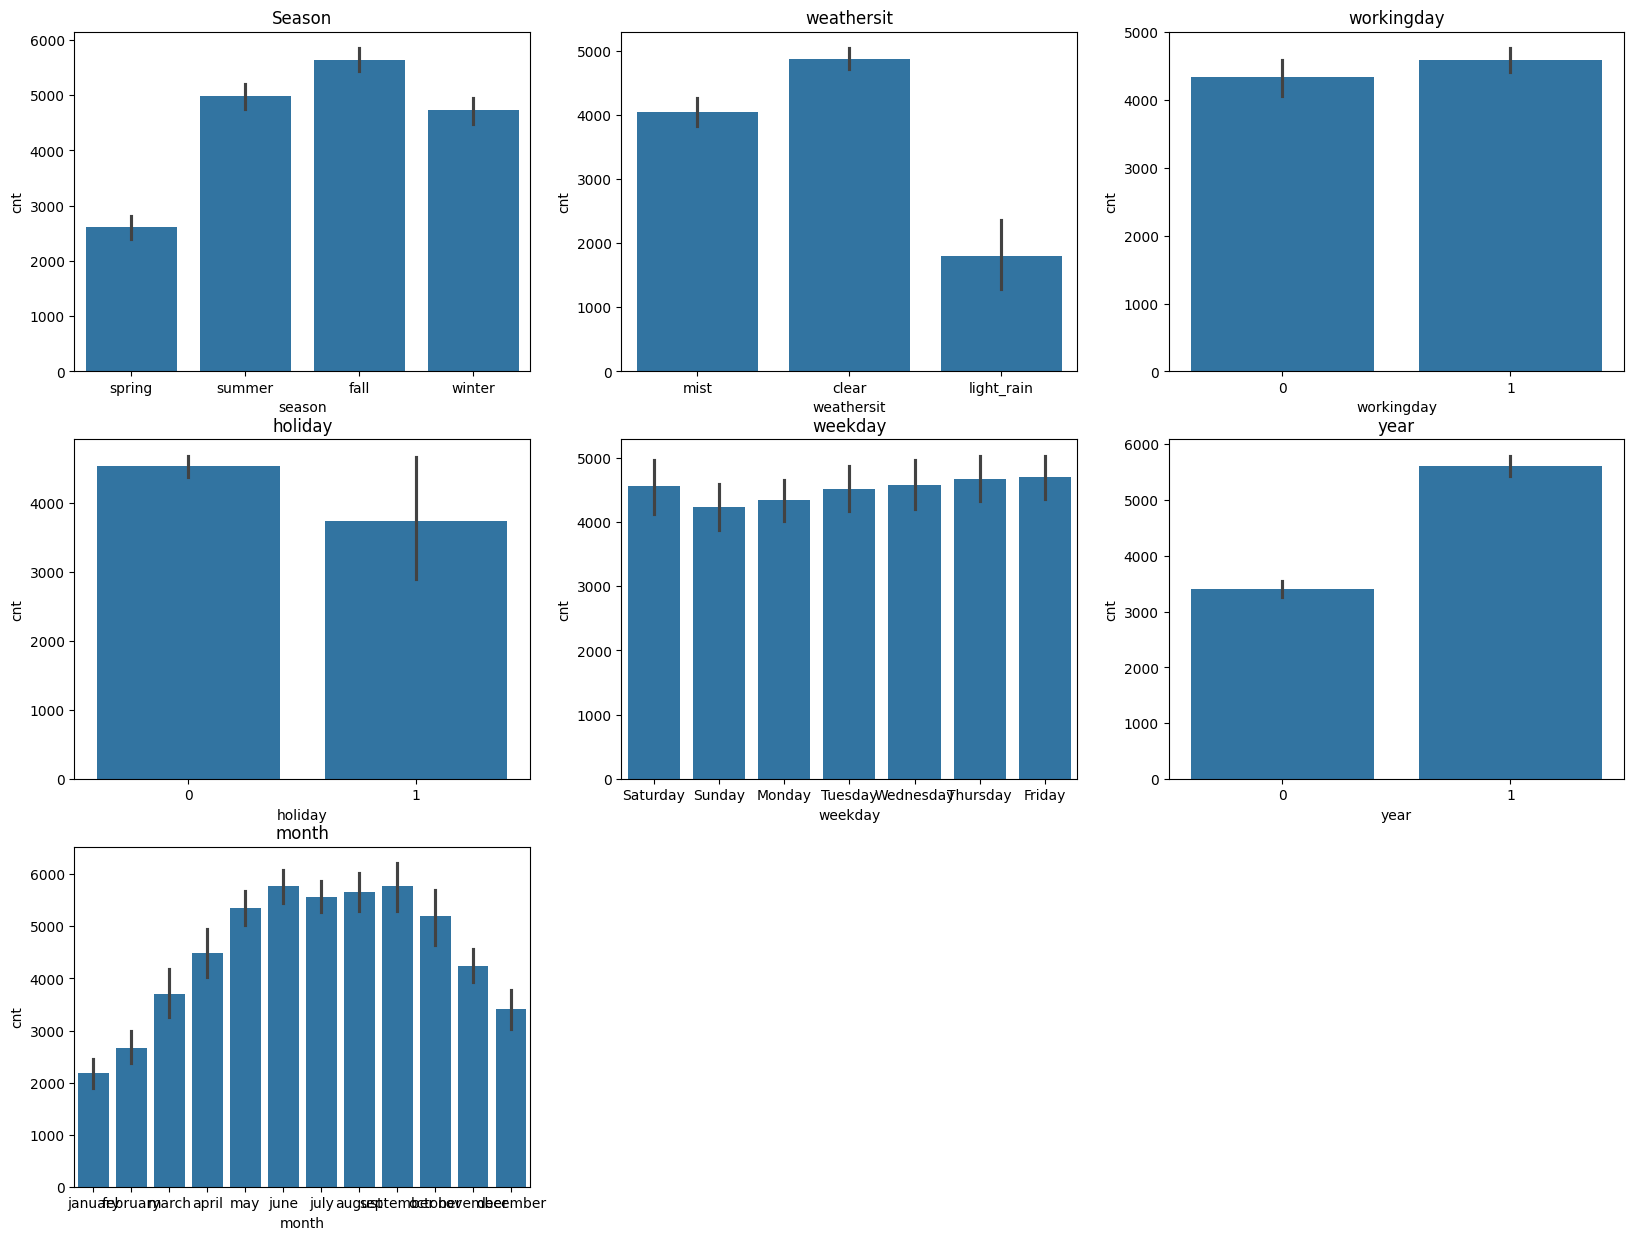

In [174]:
fig = plt.figure(figsize=(20,15))

ax0 = plt.subplot(3,3,1, title="Season")
ax1 = plt.subplot(3,3,2, title="weathersit")
ax2 = plt.subplot(3,3,3, title="workingday")
ax3 = plt.subplot(3,3,4, title="holiday")
ax4 = plt.subplot(3,3,5, title="weekday")
ax5 = plt.subplot(3,3,6, title="year")
ax6 = plt.subplot(3,3,7, title="month")
# ax7 = plt.subplot(3,3,8, title="quarter")

sns.barplot(data=df_2, ax=ax0, y='cnt', x='season')
sns.barplot(data=df_2, ax=ax1, y='cnt', x='weathersit')
sns.barplot(data=df_2, ax=ax2, y='cnt', x='workingday')
sns.barplot(data=df_2, ax=ax3, y='cnt', x='holiday')
sns.barplot(data=df_2, ax=ax4, y='cnt', x='weekday')
sns.barplot(data=df_2, ax=ax5, y='cnt', x='year')
sns.barplot(data=df_2, ax=ax6, y='cnt', x='month')
# sns.barplot(data=df_2, ax=ax7, y='cnt', x='quarter')


plt.show()

<Figure size 640x480 with 0 Axes>

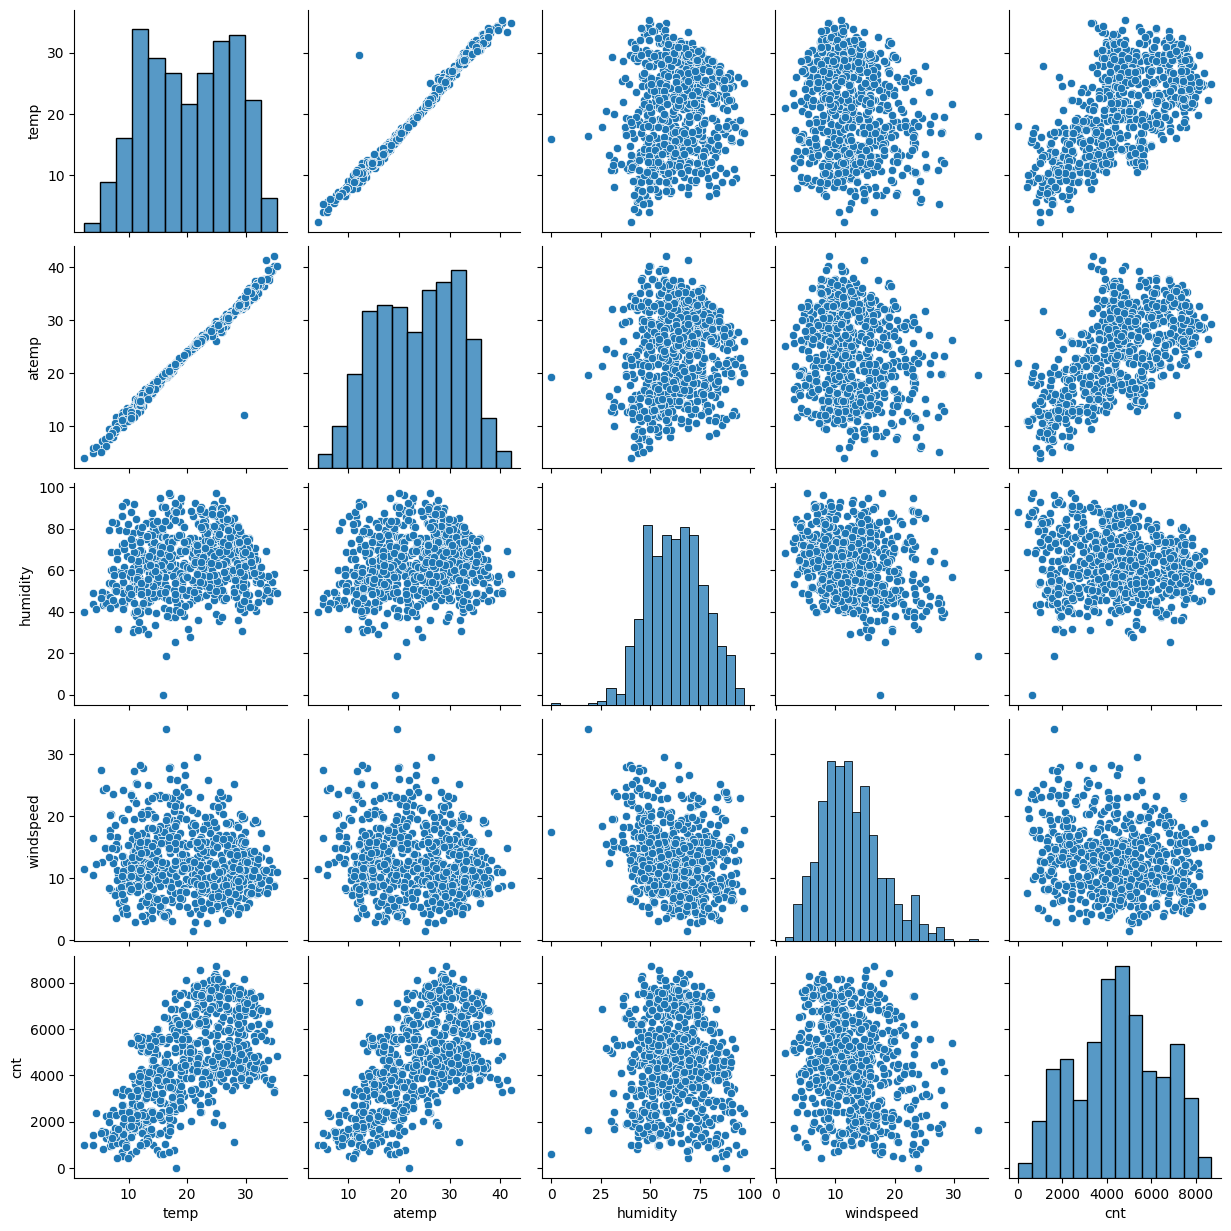

In [175]:
df_num_var = df_2[
    [
        "temp",
        "atemp",
        "humidity",
        "windspeed",
        "cnt",
    ]
]

plt.figure()
sns.pairplot(df_num_var)
plt.show()

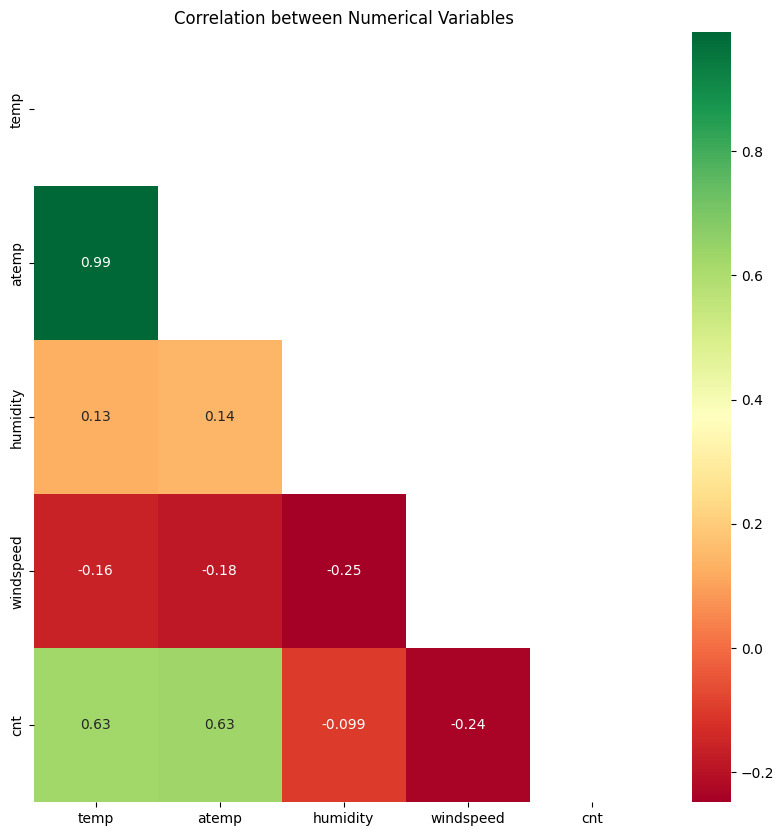

In [176]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (10,10))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Observations

- demand for bikes are high in the months of may, june, july, august, september and october
- demand for Bikes is high in fall and least in spring
- demand for Bikes is high in clear weather and least in light & heavy rain
- demand for Bikes has increased from 2018 to 2019


- the linear relationship between `temp` and `atemp` is very strong Based on Multi-collinearity, we cannot use both the variables in the model. So, we can drop one of the variables. using P-value and VIF we can decide which variable to drop later in the model building process

# Step 4: Data Preparation

In [177]:
df_3 = df_2.copy()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [178]:
# Dummy variable creation for weekday, weathersit and season variables.

dummies_for_columns = [
  "month",
  "weekday",
  "weathersit",
  "season",
  # "quarter"
]


# months_df=pd.get_dummies(df_3.month,drop_first=True)
weekdays_df=pd.get_dummies(df_3.weekday,drop_first=True, dtype=int) 
weathersit_df=pd.get_dummies(df_3.weathersit,drop_first=True, dtype=int)
seasons_df=pd.get_dummies(df_3.season,drop_first=True, dtype=int)
# quarters_df=pd.get_dummies(df_3.quarter, drop_first=True)

In [179]:
df_3.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [180]:
df_3 = pd.get_dummies(df_3, columns=dummies_for_columns, drop_first=True, dtype=int)

In [181]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   month_august           730 non-null    int64  
 9   month_december         730 non-null    int64  
 10  month_february         730 non-null    int64  
 11  month_january          730 non-null    int64  
 12  month_july             730 non-null    int64  
 13  month_june             730 non-null    int64  
 14  month_march            730 non-null    int64  
 15  month_

In [182]:
df_3.shape

(730, 30)

In [183]:
df_3.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_august,month_december,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain,weathersit_mist,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step 5: Model Building 

## Splitting the Data 

In [184]:
df_train, df_test = train_test_split(df_3, random_state=100, train_size=0.7)

In [185]:
df_train.shape

(510, 30)

In [186]:
df_test.shape

(220, 30)

In [187]:
# Using MinMaxScaler for Rescaling the features
scaler = MinMaxScaler()

In [188]:
# applying scaler to all the columns except dummy and yes/no variables

num_vars = ["temp", "atemp","humidity", "windspeed", "cnt" ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_august,month_december,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain,weathersit_mist,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


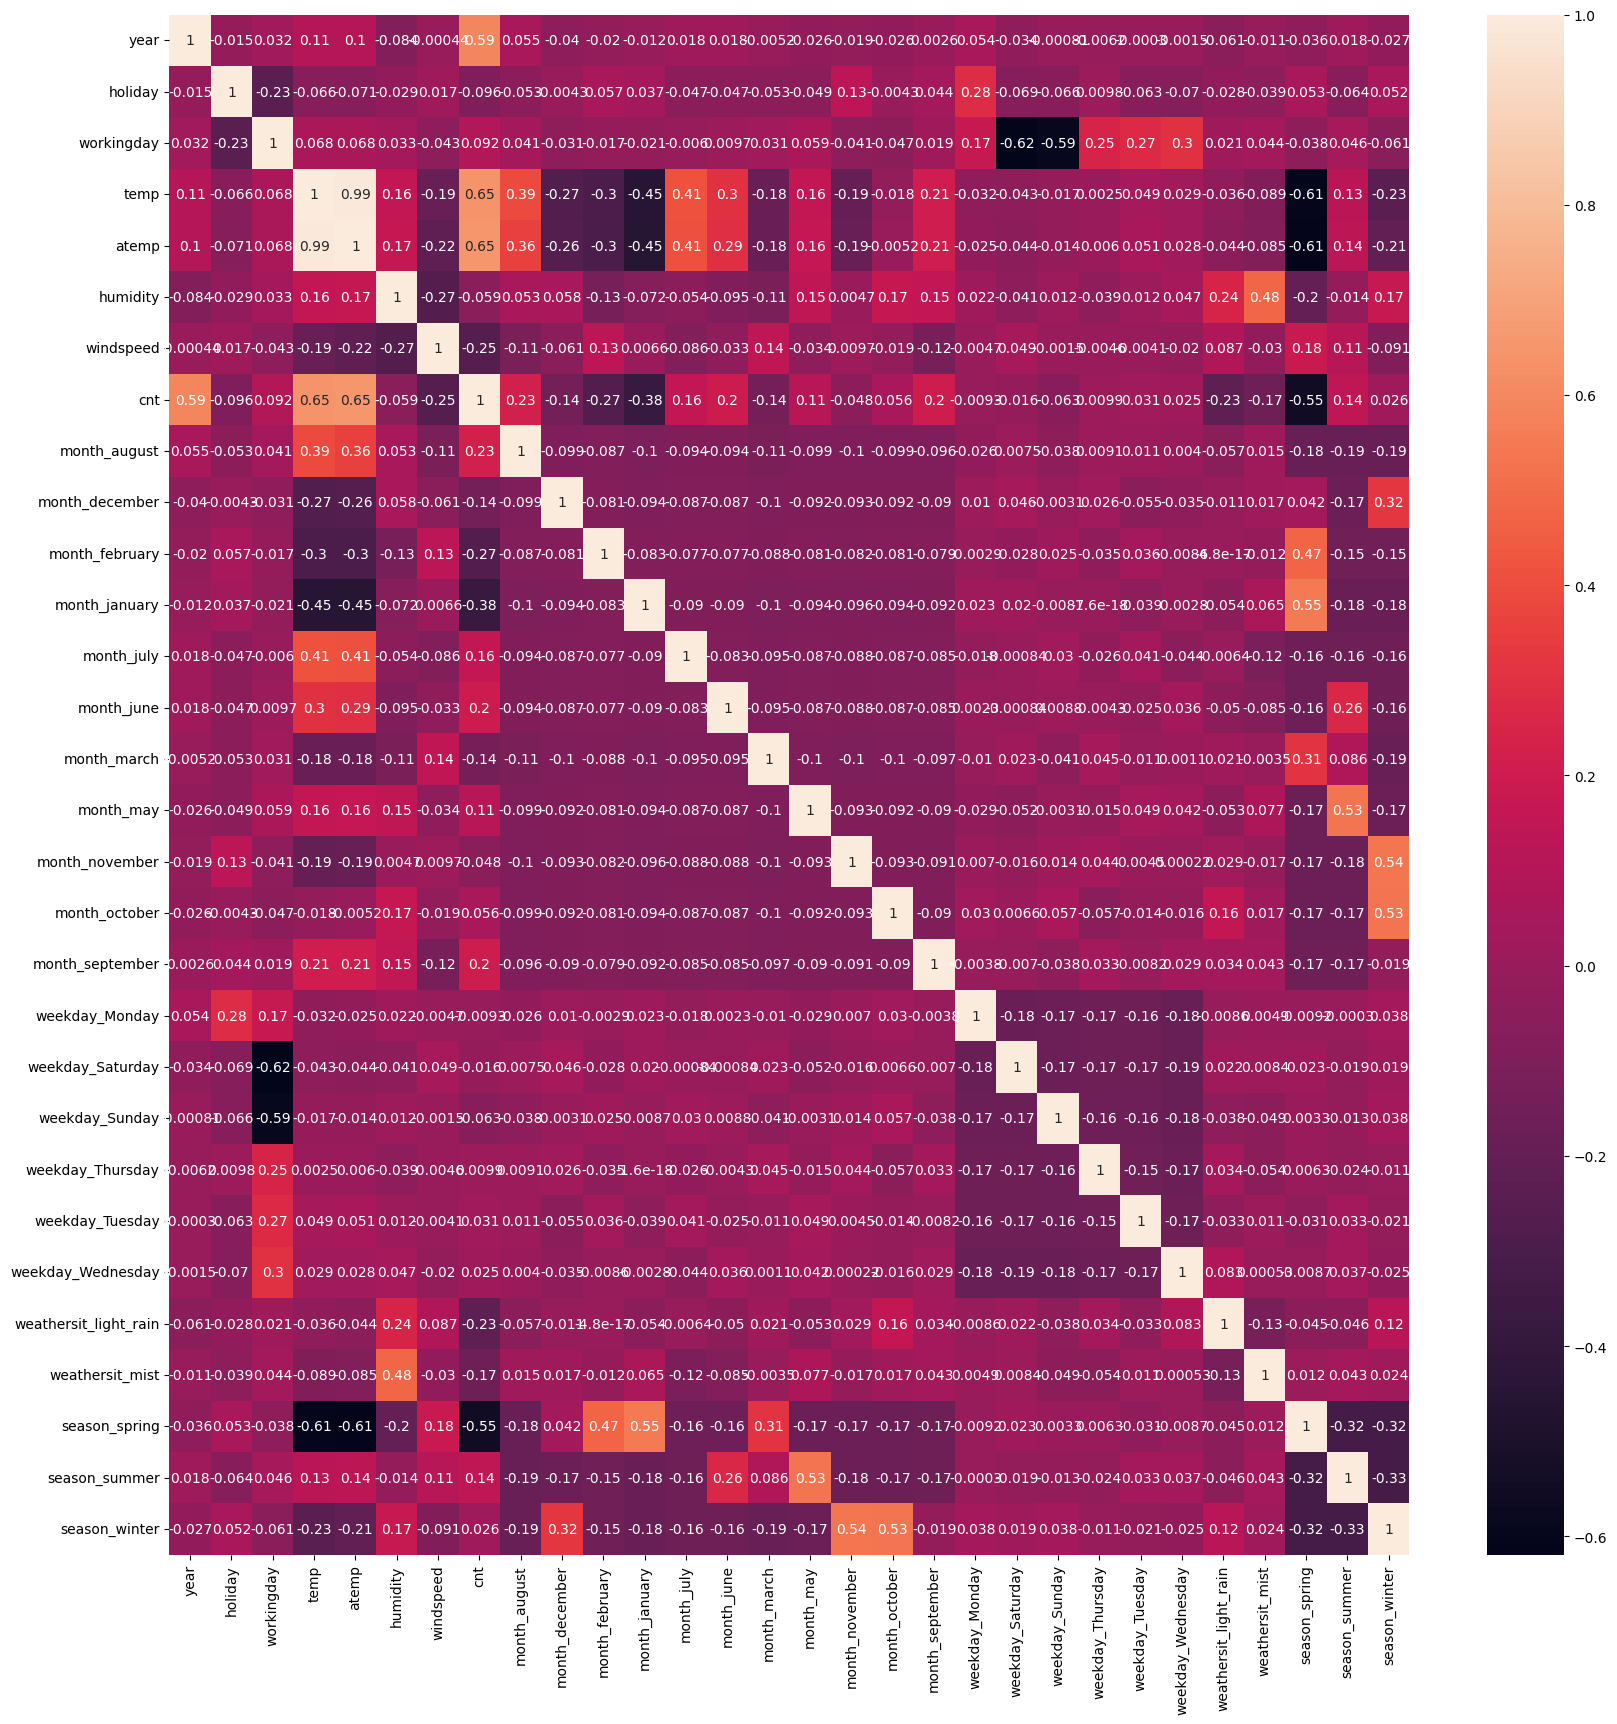

In [189]:
# Checking Correlation coefficient to see which variables are highly correlated

plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

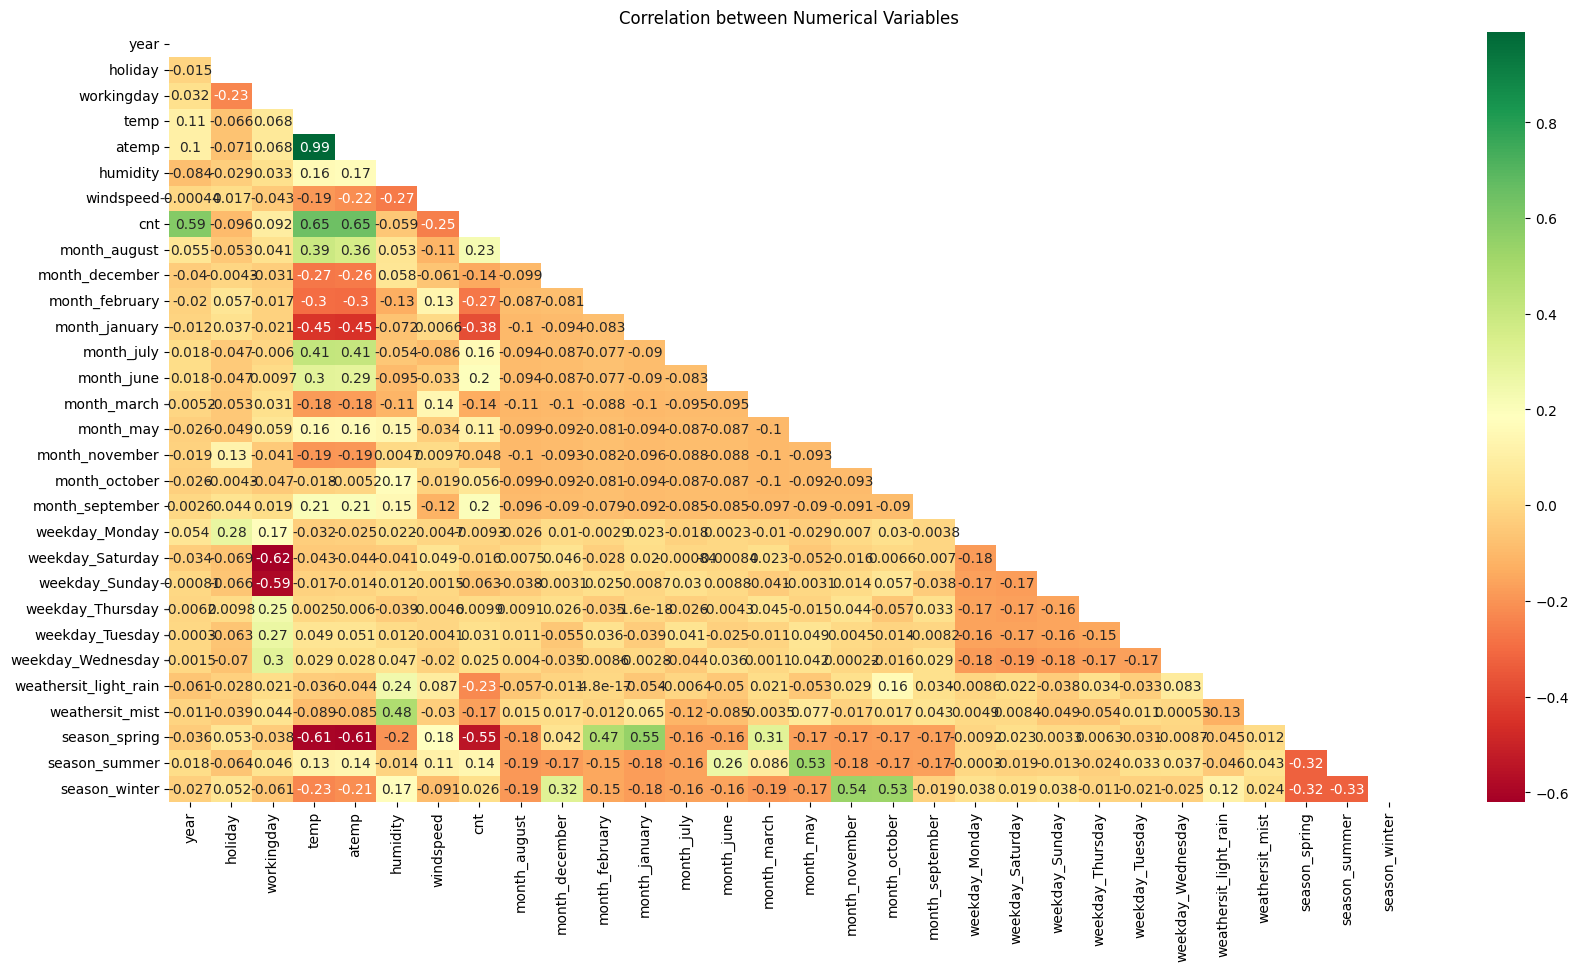

In [190]:
plt.figure(figsize = (20,10))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [191]:
def get_correlation_pair(_df):
    corr_matrix = _df.corr()
    correlations = []

    for i in range(len(corr_matrix.columns)):
        for j in range(1 + i, len(corr_matrix.columns)):
            correlations.append(
                {
                    "column_a": corr_matrix.columns[i],
                    "column_b": corr_matrix.columns[j],
                    "correlation": corr_matrix.iloc[i, j],
                }
            )

    correlations_df = pd.DataFrame(correlations)
    correlations_df = correlations_df.reindex(
        correlations_df.correlation.abs().sort_values(ascending=False).index
    )
    return correlations_df

  
  
correlation_list = get_correlation_pair(df_train).sort_values(by="correlation", ascending=False)


correlation_list.head(20)

,column_a,column_b,correlation
84,temp,atemp,0.989539
112,atemp,cnt,0.647944
87,temp,cnt,0.645048
6,year,cnt,0.591433
279,month_january,season_spring,0.548861
356,month_november,season_winter,0.536431
342,month_may,season_summer,0.529732
368,month_october,season_winter,0.529732
155,humidity,weathersit_mist,0.479436
261,month_february,season_spring,0.471540


Observations

-  `cnt` has positive correlation between and `year`, `temp` and `atemp` variable
-  `spring` has positive correlation with `january` and `february`
-  `winter` has positive correlation with `november` and `october`
-  `summer` has positive correlation with `may`
-  `mist` weather has positive correlation with `humidity`


## Linear Model building

In [192]:
# X_train, y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [193]:
def build_model(_X_train, _y_train):
  X_train_sm = sm.add_constant(_X_train)
  lr = sm.OLS(_y_train, X_train_sm)
  lr_model = lr.fit()
  print(lr_model.summary())
  return X_train_sm, lr_model
  
def list_vif(_X_train):
  vif = pd.DataFrame()

  vif["Features"] = _X_train.columns
  vif["VIF"] = [variance_inflation_factor(_X_train.values, i) for i in range(_X_train.shape[1])]
  vif["VIF"] = round(vif["VIF"], 2)
  vif = vif.sort_values(by="VIF", ascending=False)
  print(vif)

### Using RFE to select the best features

In [194]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [195]:
# running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_august', False, 7),
 ('month_december', False, 3),
 ('month_february', False, 4),
 ('month_january', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_march', False, 15),
 ('month_may', False, 6),
 ('month_november', False, 2),
 ('month_october', False, 13),
 ('month_september', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [197]:
col = X_train.columns[rfe.support_]
print(col)

removed_col = X_train.columns[~rfe.support_]
print("\n",removed_col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_january', 'month_july', 'month_september', 'weekday_Saturday',
       'weathersit_light_rain', 'weathersit_mist', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')

 Index(['atemp', 'month_august', 'month_december', 'month_february',
       'month_june', 'month_march', 'month_may', 'month_november',
       'month_october', 'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


In [198]:
X_train_rfe = X_train[col]
build_model(X_train_rfe, y_train)
list_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        20:47:19   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [199]:
X_train_final = X_train_rfe.drop(columns=["humidity", "holiday", "temp", "month_july"], axis=1)
X_train_sm_final, lr_final = build_model(X_train_final, y_train)
list_vif(X_train_final)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.01e-155
Time:                        20:47:19   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

## Residual Analysis

In [200]:
X_train_sm_final

,const,year,workingday,windspeed,month_january,month_september,weekday_Saturday,weathersit_light_rain,weathersit_mist,season_spring,season_summer,season_winter
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,0,1,0,1,1,0,0
728,1.0,1,0,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.188475,0,0,1,0,1,0,1,0
111,1.0,0,1,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.431816,0,0,1,0,1,0,0,1
79,1.0,0,1,0.529881,0,0,0,0,1,0,1,0


In [201]:
y_train_pred = lr_final.predict(X_train_sm_final)

Text(0.5, 0, 'Errors')

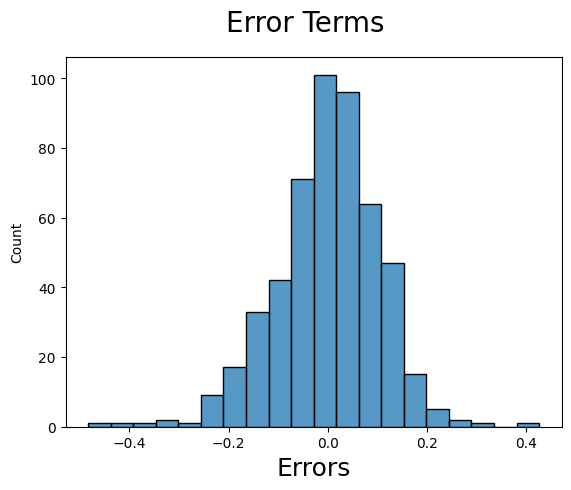

In [202]:
fig  = plt.figure()
sns.histplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

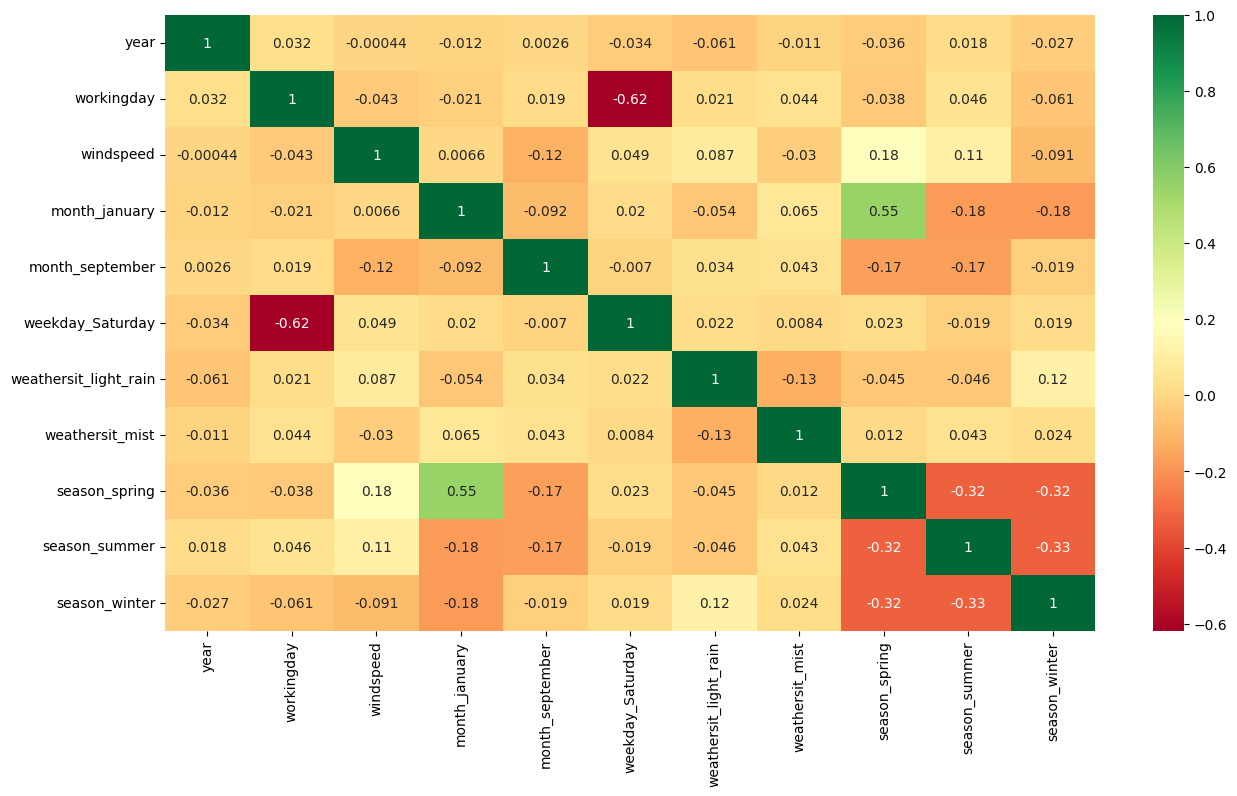

In [203]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_final.corr(),annot = True, cmap="RdYlGn")
plt.show()

# Step 6 Making Predictions

In [204]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_august,month_december,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain,weathersit_mist,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [205]:
y_test = df_test.pop('cnt')
X_test = df_test

In [206]:
# Creating X_test_new Dataframe by dropping variables from X_test
cols = X_train_final.columns
X_test = X_test[cols]

X_test_lm_6 = sm.add_constant(X_test)

In [207]:
y_pred = lr_final.predict(X_test_lm_6)

In [208]:
from sklearn.metrics import r2_score

In [209]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7417

# Step 7 Model Evaluation

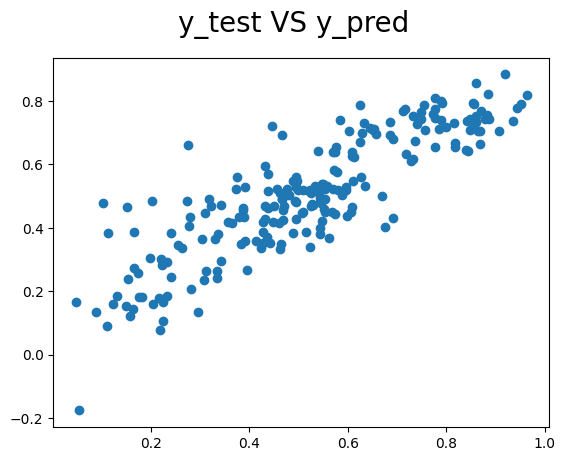

In [210]:
fig = plt.figure()

plt.scatter(y_test, y_pred)
fig.suptitle('y_test VS y_pred', fontsize=20)
plt.show()

In [211]:
round(lr_final.params,4)

const                    0.5332
year                     0.2480
workingday               0.0564
windspeed               -0.1887
month_january           -0.1033
month_september          0.0715
weekday_Saturday         0.0648
weathersit_light_rain   -0.3023
weathersit_mist         -0.0874
season_spring           -0.2581
season_summer           -0.0394
season_winter           -0.0743
dtype: float64

In [212]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7281


Comparing between Training and Testing dataset:

- Train dataset R^2          : 0.779
- Test dataset R^2           : 0.7417
- Train dataset Adjusted R^2 : 0.774 
- Test dataset Adjusted R^2  : 0.7281
Demand of bikes depend on `year`, `workingday`,`windspeed`,`month_january`,`month_september`,`weekday_Saturday`,`weathersit_light_rain`,`weathersit_mist`,`season_spring`,`season_summer` and `season_winter`